In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census
from us import states
import gmaps
import scipy.stats as st
import csv
import plotly.express as px

In [32]:
# The path to our CSV file
csv_path = "indiana_education.csv"
education_df = pd.read_csv(csv_path)

election_results_file = "in_clean_result.csv"
election_result_df = pd.read_csv(election_results_file)

In [33]:
education_df

,Unnamed: 0,State,County,White Pop (25 and over),White Males (25 and over),White Male (less than High School),White Male (High School),White Male (some college),White Male (Bachelor's or higher),White Female (25 and over),...,Af-Am Male (25 and over),Af-Am Male (less than High School),Af-Am Male (High School),Af-Am Male (some college),Af-Am Male (Bachelor's or higher),Af-Am Female (25 and over),Af-Am Female (less than High School),Af-Am Female (High School),Af-Am Female (some college),Af-Am Female (Bachelor's or higher)
0,759,Indiana,Adams County,20420.0,9856.0,1551.0,4343.0,2332.0,1630.0,10564.0,...,21.0,12.0,9.0,0.0,0.0,30.0,29.0,0.0,0.0,1.0
1,760,Indiana,Allen County,196491.0,94430.0,8658.0,26820.0,30917.0,28035.0,102061.0,...,10823.0,2307.0,3695.0,3346.0,1475.0,13303.0,1947.0,4419.0,5211.0,1726.0
2,761,Indiana,Bartholomew County,47511.0,22931.0,2132.0,8974.0,5477.0,6348.0,24580.0,...,606.0,114.0,69.0,170.0,253.0,455.0,13.0,184.0,168.0,90.0
3,762,Indiana,Benton County,5732.0,2759.0,271.0,1289.0,779.0,420.0,2973.0,...,12.0,1.0,0.0,2.0,9.0,22.0,0.0,13.0,9.0,0.0
4,763,Indiana,Blackford County,8509.0,4084.0,582.0,1972.0,1074.0,456.0,4425.0,...,40.0,0.0,26.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,846,Indiana,Washington County,18705.0,9170.0,1489.0,4443.0,2079.0,1159.0,9535.0,...,9.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
88,847,Indiana,Wayne County,42587.0,19991.0,2995.0,7898.0,5809.0,3289.0,22596.0,...,1108.0,200.0,496.0,274.0,138.0,1021.0,68.0,399.0,376.0,178.0
89,848,Indiana,Wells County,18374.0,8879.0,799.0,3767.0,2804.0,1509.0,9495.0,...,38.0,5.0,13.0,20.0,0.0,27.0,0.0,8.0,19.0,0.0
90,849,Indiana,White County,15939.0,7741.0,788.0,3445.0,2352.0,1156.0,8198.0,...,38.0,0.0,0.0,38.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
election_result_df.rename(columns={"county_name":"County"}, inplace=True)

In [35]:
election_education_race = pd.merge(election_result_df, education_df, on="County", how="outer")
election_education_race

,votes_dem,votes_gop,total_votes,per_dem,per_gop,state_abbr,County,Unnamed: 0,State,White Pop (25 and over),...,Af-Am Male (25 and over),Af-Am Male (less than High School),Af-Am Male (High School),Af-Am Male (some college),Af-Am Male (Bachelor's or higher),Af-Am Female (25 and over),Af-Am Female (less than High School),Af-Am Female (High School),Af-Am Female (some college),Af-Am Female (Bachelor's or higher)
0,2802,9642,13039,0.214894,0.739474,IN,Adams County,759,Indiana,20420.0,...,21.0,12.0,9.0,0.0,0.0,30.0,29.0,0.0,0.0,1.0
1,55222,83801,145787,0.378785,0.574818,IN,Allen County,760,Indiana,196491.0,...,10823.0,2307.0,3695.0,3346.0,1475.0,13303.0,1947.0,4419.0,5211.0,1726.0
2,9841,20637,32389,0.303838,0.637161,IN,Bartholomew County,761,Indiana,47511.0,...,606.0,114.0,69.0,170.0,253.0,455.0,13.0,184.0,168.0,90.0
3,860,2579,3654,0.235359,0.705802,IN,Benton County,762,Indiana,5732.0,...,12.0,1.0,0.0,2.0,9.0,22.0,0.0,13.0,9.0,0.0
4,1243,3349,4822,0.257777,0.694525,IN,Blackford County,763,Indiana,8509.0,...,40.0,0.0,26.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,2636,8206,11333,0.232595,0.724080,IN,Washington County,846,Indiana,18705.0,...,9.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
88,8322,16028,25575,0.325396,0.626706,IN,Wayne County,847,Indiana,42587.0,...,1108.0,200.0,496.0,274.0,138.0,1021.0,68.0,399.0,376.0,178.0
89,2585,9999,13123,0.196982,0.761945,IN,Wells County,848,Indiana,18374.0,...,38.0,5.0,13.0,20.0,0.0,27.0,0.0,8.0,19.0,0.0
90,2563,6813,9902,0.258837,0.688043,IN,White County,849,Indiana,15939.0,...,38.0,0.0,0.0,38.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
county_list = election_education_race['County'].tolist()

In [37]:
monroe_county = election_education_race[(election_education_race.County == "Monroe County")]
johnson_county = election_education_race[(election_education_race.County == "Johnson County")]                                        

In [45]:
monroe_county

,votes_dem,votes_gop,total_votes,per_dem,per_gop,state_abbr,County,Unnamed: 0,State,White Pop (25 and over),...,Af-Am Male (25 and over),Af-Am Male (less than High School),Af-Am Male (High School),Af-Am Male (some college),Af-Am Male (Bachelor's or higher),Af-Am Female (25 and over),Af-Am Female (less than High School),Af-Am Female (High School),Af-Am Female (some college),Af-Am Female (Bachelor's or higher)
52,34183,20527,57623,0.593218,0.356229,IN,Monroe County,811,Indiana,72255.0,...,1208.0,126.0,199.0,353.0,530.0,946.0,91.0,171.0,347.0,337.0


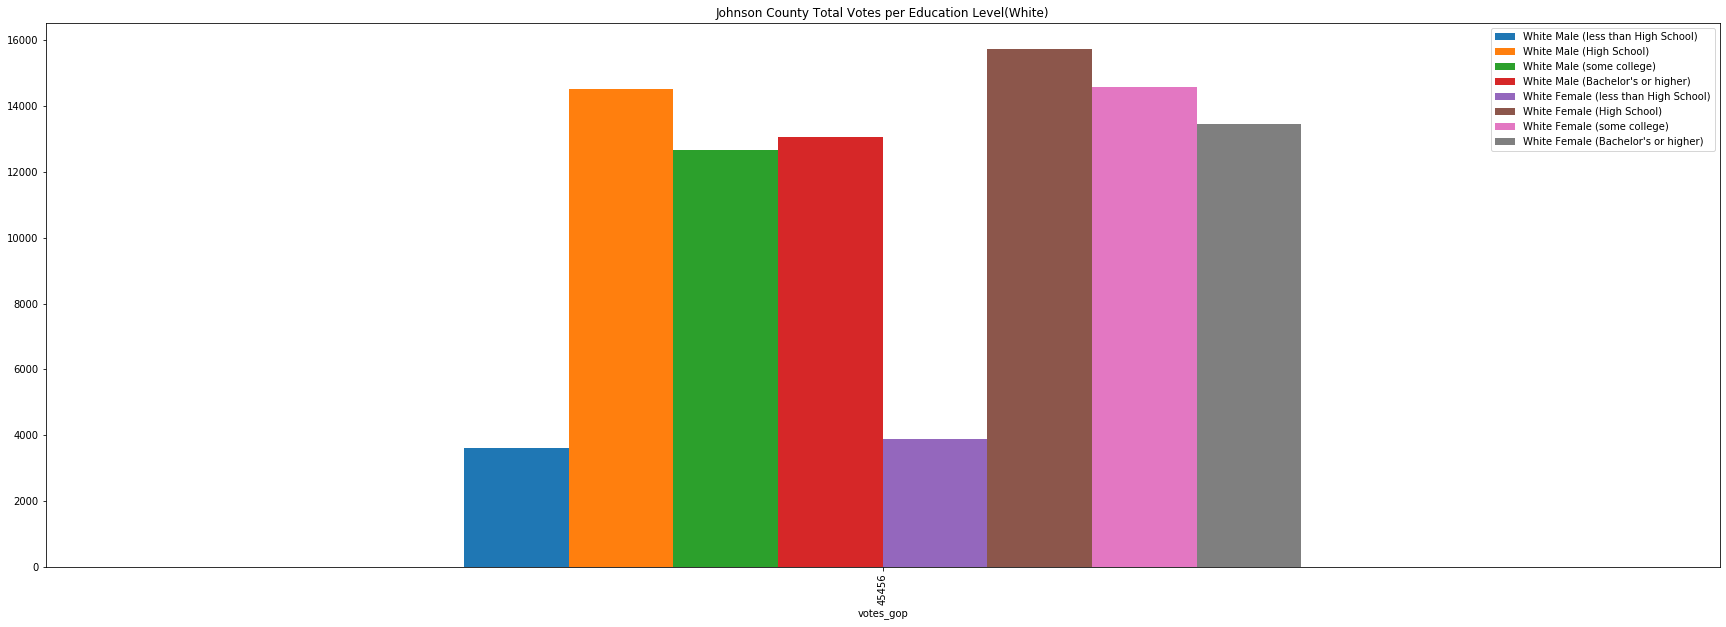

<Figure size 432x288 with 0 Axes>

In [47]:
johnson_county.plot(x='total_votes', y=['White Male (less than High School)', 'White Male (High School)',
       'White Male (some college)', "White Male (Bachelor's or higher)",
       'White Female (less than High School)',
       'White Female (High School)', 'White Female (some college)',
       "White Female (Bachelor's or higher)"], kind='bar',width=0.5, figsize=(30,10))

# Set a title for the chart
plt.title("Johnson County Total Votes per Education Level(White)")
plt.show()
plt.tight_layout()

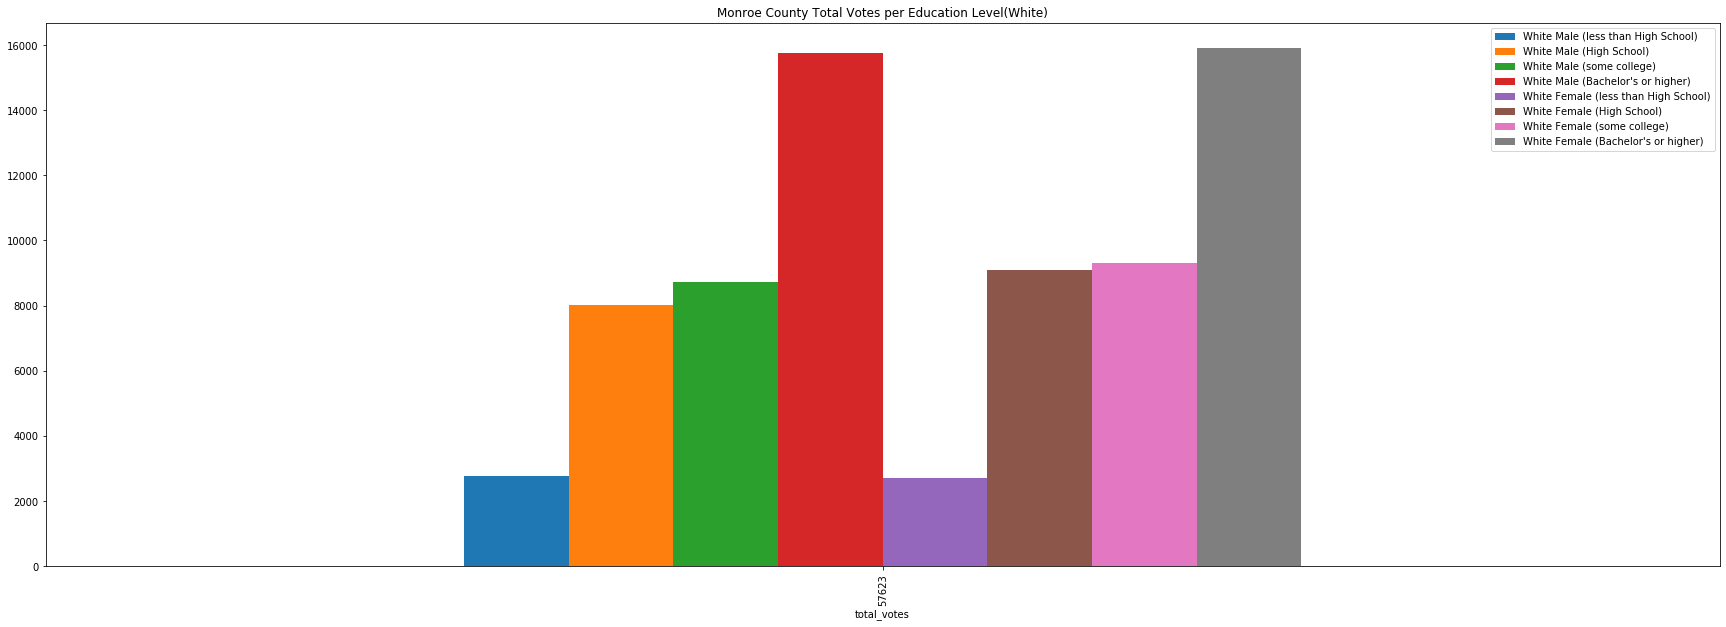

<Figure size 432x288 with 0 Axes>

In [42]:
monroe_county.plot(x='total_votes', y=['White Male (less than High School)', 'White Male (High School)',
       'White Male (some college)', "White Male (Bachelor's or higher)",
       'White Female (less than High School)',
       'White Female (High School)', 'White Female (some college)',
       "White Female (Bachelor's or higher)"], kind='bar',width=0.5, figsize=(30,10))

# Set a title for the chart
plt.title("Monroe County Total Votes per Education Level(White)")
plt.show()
plt.tight_layout()

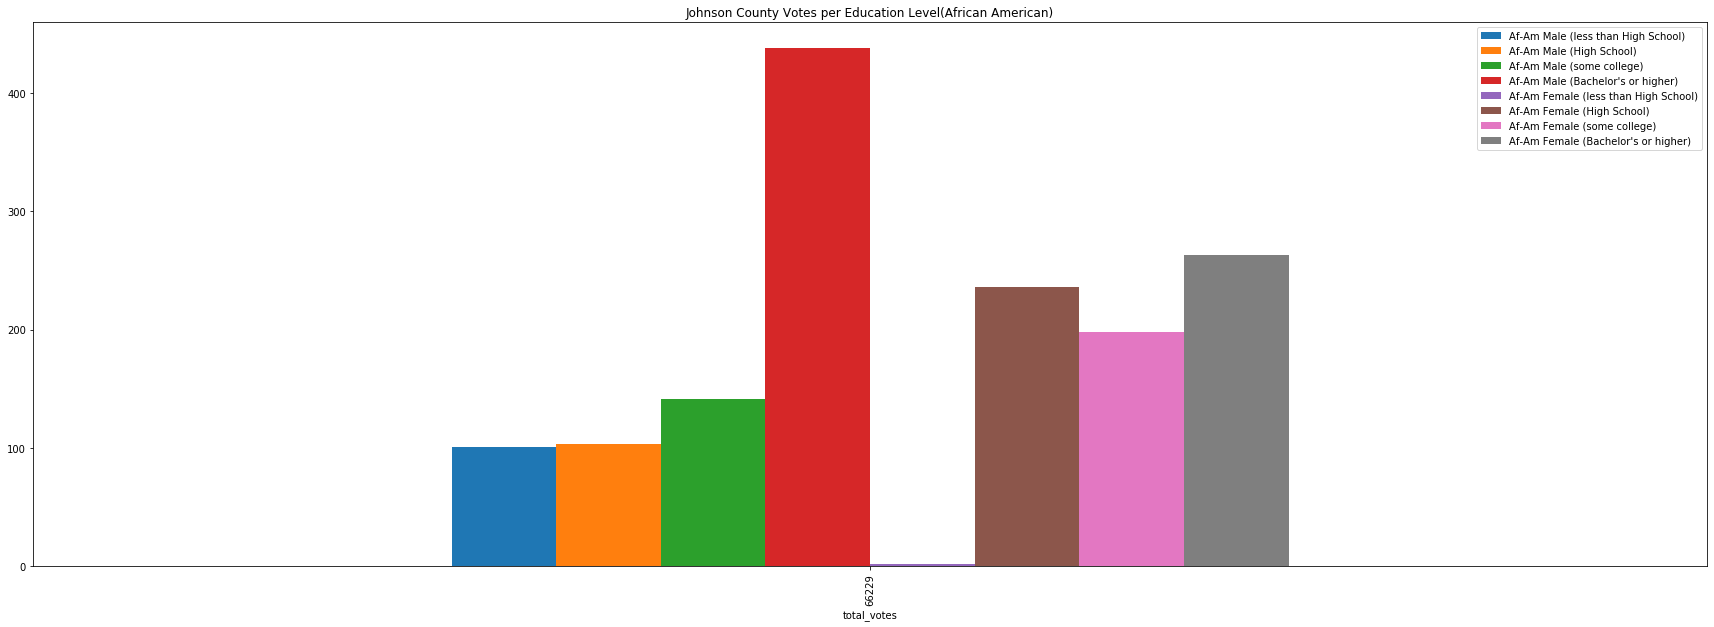

<Figure size 432x288 with 0 Axes>

In [43]:
johnson_county.plot(x='total_votes', y=['Af-Am Male (less than High School)',
       'Af-Am Male (High School)', 'Af-Am Male (some college)',
       "Af-Am Male (Bachelor's or higher)",
       'Af-Am Female (less than High School)', 'Af-Am Female (High School)',
       'Af-Am Female (some college)', "Af-Am Female (Bachelor's or higher)"], kind='bar',width=0.5, figsize=(30,10))

# Set a title for the chart
plt.title("Johnson County Population per Education Level(African American)")
plt.show()
plt.tight_layout()

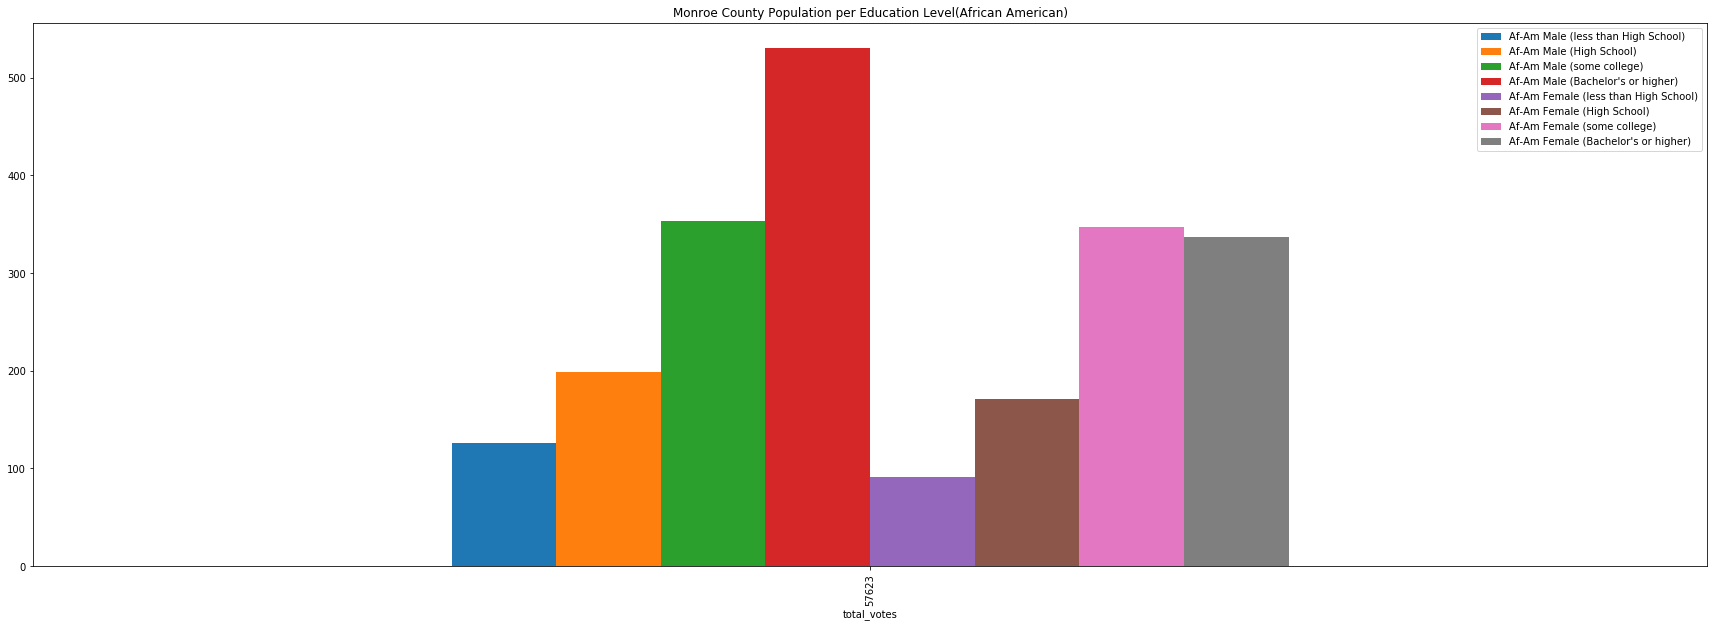

<Figure size 432x288 with 0 Axes>

In [46]:
monroe_county.plot(x='total_votes', y=['Af-Am Male (less than High School)',
       'Af-Am Male (High School)', 'Af-Am Male (some college)',
       "Af-Am Male (Bachelor's or higher)",
       'Af-Am Female (less than High School)', 'Af-Am Female (High School)',
       'Af-Am Female (some college)', "Af-Am Female (Bachelor's or higher)"], kind='bar',width=0.5, figsize=(30,10))

# Set a title for the chart
plt.title("Monroe County Population per Education Level(African American)")
plt.show()
plt.tight_layout()